Sometimes life has a cruel sense of humor, giving you the thing you always wanted at teh worst time possible. - Lisa Kleypas  
때로는 인생은 잔인한 해학적 감각을 지닌다, 늘 원했던 것을 가장 나쁜 때에 준다. - 리사 클레이파

타이타닉 호의 침몰은 역사상 가장 유명한 난파사고 중 하나이다.  
1912년 4월 15일의 첫 항해에서, 타이타닉 호는 빙하와 충돌 후 가라앉았고, 2224명의 승객과 선원 중 1502명이 사망했다.  
그것이 이 제목이 DieTanic인 이유이다.  
이것은 정말 잊을 전 세계가 수 없는 재앙이다.  
  
타이타닉 데이터세트는 초심자가 데이터 사이언스와 캐글을 시작하기에 아주 좋은 데이터셋이다.  
  
이 노트북은 어떻게 모델링 문제를 해결해갈지에 대한 아이디어를 제공할 것이다. 어떻게 피쳐를 체크하고, 어떻게 새로운 피쳐를 추가하고 머신러닝 컨셉을 잡을 것인지.  
이 노트북은 뉴비들이 이해하기 쉽게 가능한 기본적인 형태를 유지할 것이다.  
  
만약 이 노트북이 마음에 들면 투표좀 부탁한다. 그럼 나도 열심히 할게

노트북 컨셉 :  
  
Part1 : Exploratory Data Analysis(EDA):  
1) Analysis of the features.  
2) Finding any relations or trends considering multiple features.    
  
  
Part2 : Feature Engineeering and Data Cleaning  
1) Adding any few features.  
2) Removing radundant features.  
3) Converting features into suitable form for modeling.  
  
  
Part3. Predictive Modeling  
1) Running Basic Algorithms.  
2) Cross Validation.  
3) Ensembling.  
4) Important Features Extraction.  

## Part1 : Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # fivethirtyeight Style Sheet 사용
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('./titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # checking for total null values 결측값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 결측치가 있다. 나중에 이것을 고쳐보자.  
  
얼마나 살아남았는가?

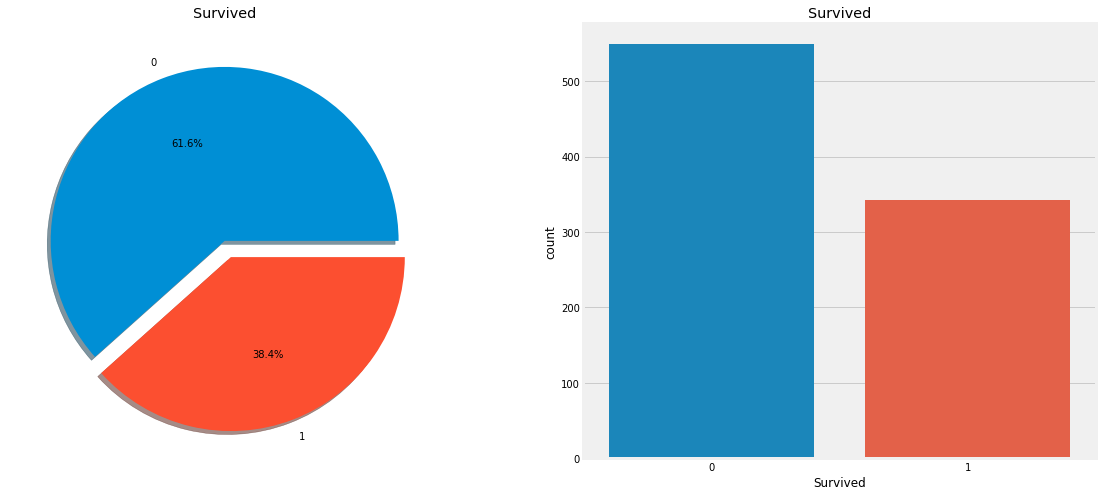

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고로 많은 승객이 살지 못했음이 명확히 보입니다.  
트레이닝 셋에 891명의 승객이 있고, 350명 정도의 승객만이 살아남았습니다. 다시 말해서 트레이닝 셋의 전체 중 38.4%가 사고에서 생존했습니다.  
우리는 이 데이터에서 더 좋은 인사이트를 얻도록 파헤치고 어떤 카테고리의 승객들이 살아남았는지 찾아야 합니다.  
  
우리는 생존률을 다른 데이터셋의 다른 특징과 함께 체크할 것입니다. 그 특징들은 성별, 탑승항구, 나이 등이 될것입니다.  
  
먼저 다른 타입의 특징들을 살펴봅시다.

### Type Of Features
#### Categorical Features: 
Categorical variable은 두개 혹은 더 많은 범주에서 하나이거나 범주로 표현할 수 있는 값을 의미한다. 예를 들어, 성별은 male과 female 두개의 범주를 가지는 categorical variable이다. 우리는 이러한 데이터를 정렬하거나 순서를 지정할 수 없습니다. Nominal Variables 라고도 합니다.  
  
**해당 데이터셋의 Categorical Features : Sex, Emabrked.**  
  
#### Ordinal Features.
Ordinal variable은 Categorical variable과 비슷하지만, 다른점은 이 값은 순서를 매길 수 있다는 것입니다. 높이로 예를 들면, 크다, 중간, 짧다로 순서를 매길 수 있습니다. 높이는 Ordinal 하다고 볼 수 있고, 우리는 Ordinal Variable을 정렬할 수 있습니다.  
  
**해당 데이터셋의 Ordinal Features : PClass**  
  
#### Continous Feature:
Continous variable은 두 지점사이 어떤 값이나 최소 ~ 최대값 사이의 값을 가지는 값입니다.  
  
**해당 데이터셋의 Continous Features : Age**  
  
  
### Analysing The Features  
  
  
### Sex -> Categorical Feature

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

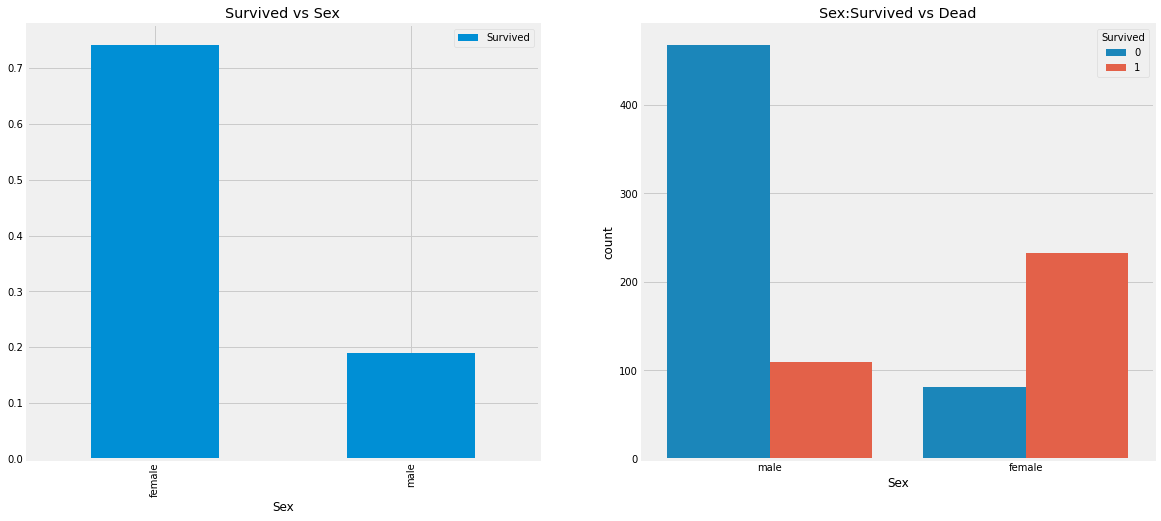

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1]) # 성별 별로 생존여부를 비교하는 막대그래프 생성
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

흥미롭네요. 남자가 여자보다 많이 탔지만, 생존자는 여자가 남자의 두배가량 됩니다. 생존률로 보면 여자는 약 75%, 남자는 약 18~19% 정도 됩니다.  
  
이것은 모델링을 위한 아주 중요한 특징으로 보입니다. 하지만 이게 최고일까요? 다른 특징들도 살펴보죠.  
  
  
### PClass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# Pclass별 생존여부 크로스탭으로 표시

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


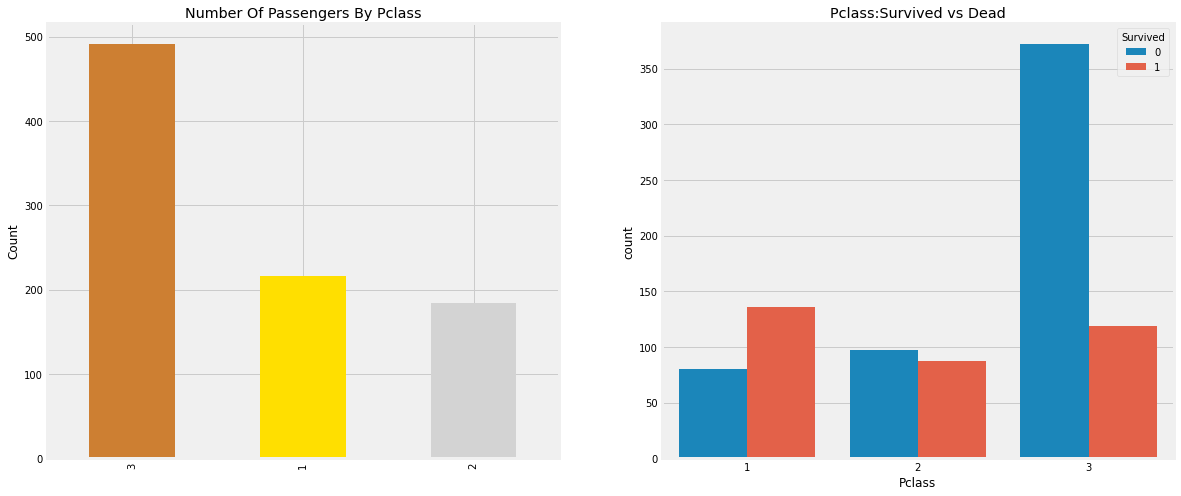

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1]) # Pclass별 생존여부 비교그래프
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든걸 살수 없다고 합니다. 하지만 1클래스의 승객들이 가장 우선적으로 구조됐다는 것을 명확히 보여주고 있습니다. 비록 3클래스인 승객의 비율이 높다고 하지만 살아남은 사람은 25%정도로 적습니다.  
  
1클래스의 생존률은 63%, 2클래스는 48% 정도입니다. (푸념)  
  
다른 흥미로운점을 발견하기 위해 좀더 가보자고. 성별과 클래스를 함께 생존율과 비교해봅시다.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

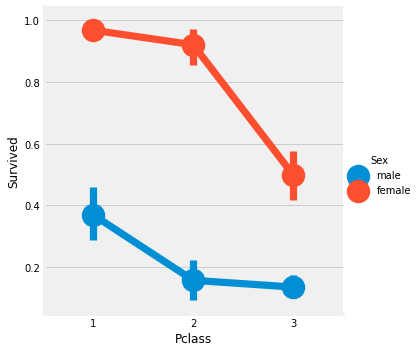

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- 우리는 FactorPlot을 사용했습니다. 왜냐면 categorical value들을 쉽게 표현할 수 있습니다.
- CrossTab과 FactorPlot을 보면 우리는 쉽게 1클래스의 여자들의 높은 생존률을 추론할 수 있습니다. 94명 중 3명만 죽었습니다.
- 이것은 클래스와 상관없이 여자들이 우선순위로 구조되었음이 분명합니다. 클래스1의 남자 또한 생존률이 낮습니다.
- Pclass도 중요한 특징인 것 같네요. 다른 특징도 분석해봅시다.  
  
  
  
### Age -> Continous Feature

In [12]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of :', data['Age'].min(), 'Years')
print('Average Age on the ship :', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Age on the ship : 29.69911764705882 Years


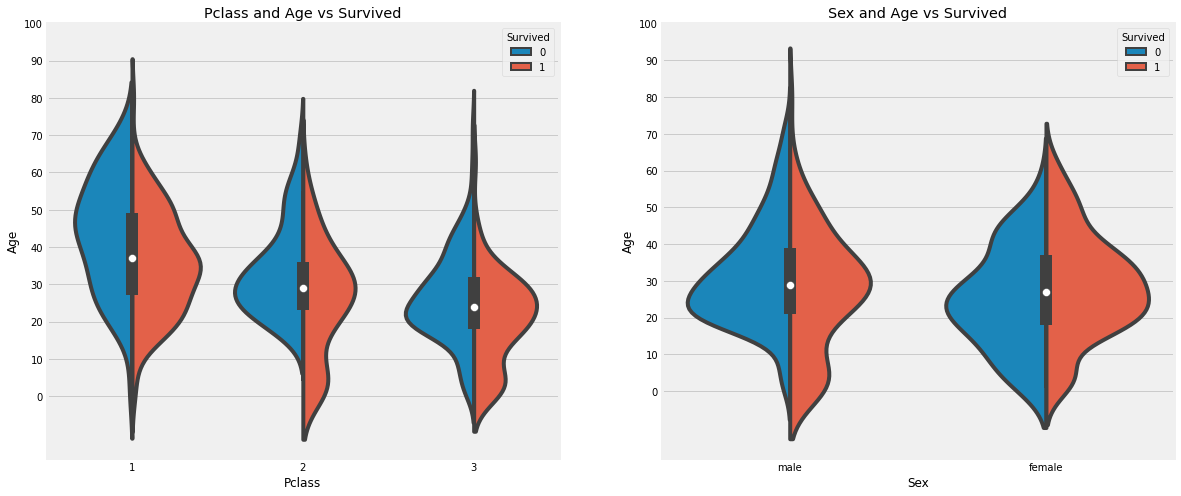

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations**  
1) 어린이의 수는 Pclass와 같이 증가하며, 10세 미만의 승객은 클래스와 상관없이 생존률이 좋습니다.  
  
2) 승객들의 생존기회는 1클래스의 20~50이 높고, 여자에게서 더 높습니다.  
  
3) 남자의 경우, 생존기회가 나이의 증가에 따라 감소합니다.  
  
  
  
- 우리는 먼저 나이에 177개의 결측치가 있는걸 확인했습니다. 이 NaN 값들을 대체할건데, 데이터셋의 나이 평균값으로 대체해 보겠습니다.
- 하지만 문제가 있습니다. 너무 많은 사람과 다양한 나이가 있습니다. 4살 애기한테 평균값이라고 29살을 넣을 순 없습니다. 승객에게 맞는 나이 매칭 방법이 없을까요?
- 빙고! 우리는 승객의 이름이 있습니다. 이름을 확인해보면, 우리는 Mr와 Mrs같은 경칭이 붙어있는 것을 알수있습니다. 그러므로 우리는 해당 경칭에 따라 평균을 적용하도록 합시다.

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

좋아 여기서 우리가 Regex:[A-Za-z]+)..를 쓴 이유는 A-Z와 a-z 이후에 .이 따라오는 문자열을 찾아오기 때문이야. 우리는 성공적으로 Initial을 이름에서 분리해냈어.

In [15]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


좋아, 여기서 오타로 보이는 Mlle, Mme는 Miss로 대체하자. 난 저것들을 Miss나 비슷한 다른 값들로 대체할거야.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean() # Initial 별 평균나이

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling Nan Ages

In [18]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull().any()

False

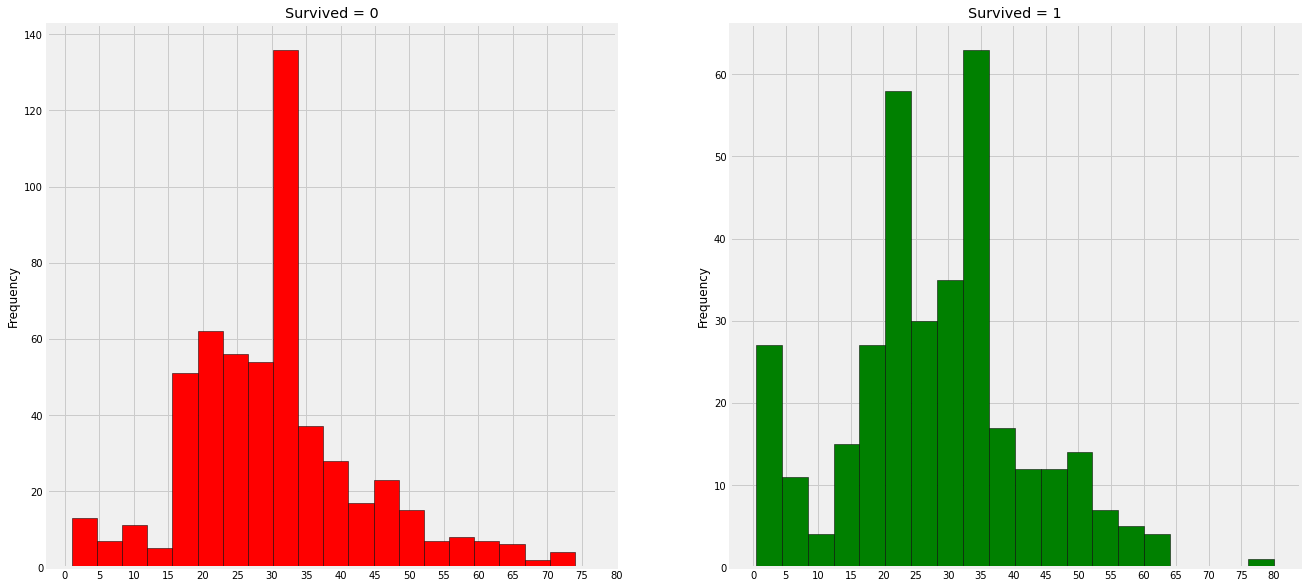

In [20]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

**Obserbations:**  
1) 애기들은 많이 살았다. (여자들과 애기들이 우선이었다.)  
2) 최고령 승객은 살았다.  
3) 가장 많은 사람이 죽은 구간은 30~40세 구간이다.

<function matplotlib.pyplot.show>

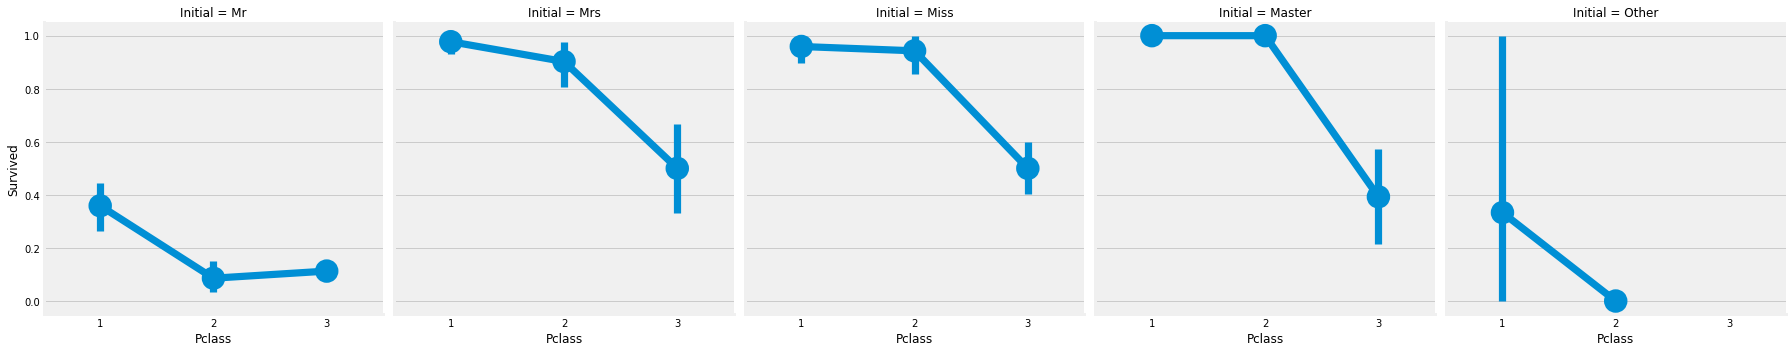

In [21]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
# Initial(column 설정) 에 따라 Pclass, Survived 표시
plt.show

클래스와 상관없이 여성과 아동에 대한 예측은 맞다고 볼 수 있다.  
  
  
### Embarked -> Categorical Value

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port Of Embarkation**

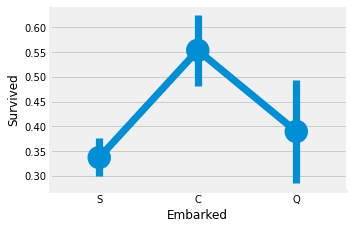

In [23]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf() # get current figure
fig.set_size_inches(5, 3)
plt.show()

C항구에서 탑승한 승객의 생존률이 약 0.55로 가장 높고, S에서 탑승한 승객의 생존률이 가장 낮다.

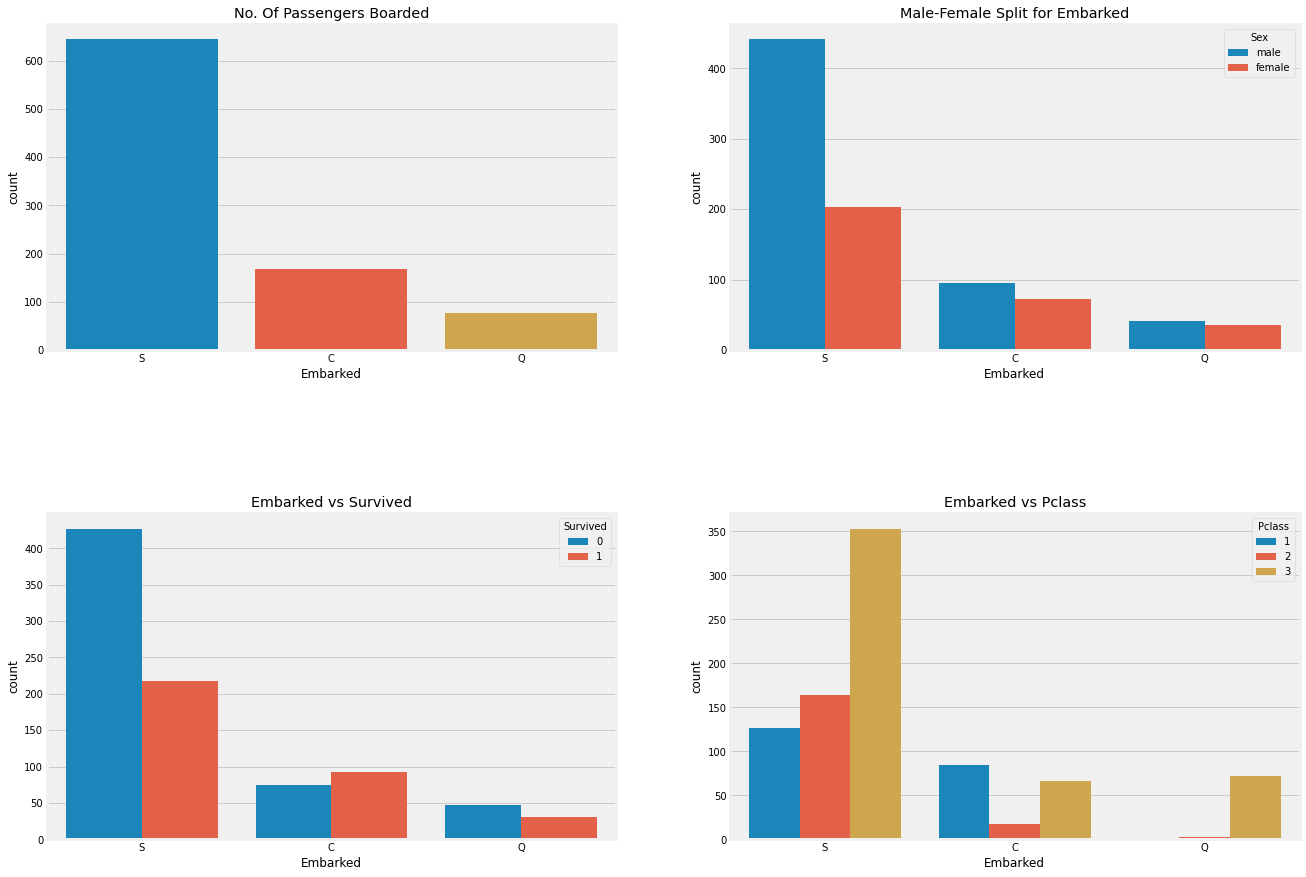

In [24]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Observation:**  
1) S에서 가장 많은 승객이 탑승했습니다. 대부분은 3클래스의 승객입니다.  
2) C의 승객들은 생존률이 좋기 때문에 운이 좋아 보일 수 있습니다. 그것은 1클래스와 2클래스의 승객 비율떄문일 수도 있습니다.  
3) S항구는 부자 승객의 대부분이 탑승했지만 생존률이 낮습니다. 81%가 살아남지 못한 3클래스 승객이 많이 탑승해서 그런 것 같습니다.  
4) Q항구는 거의 95%의 승객이 3클래스 입니다.

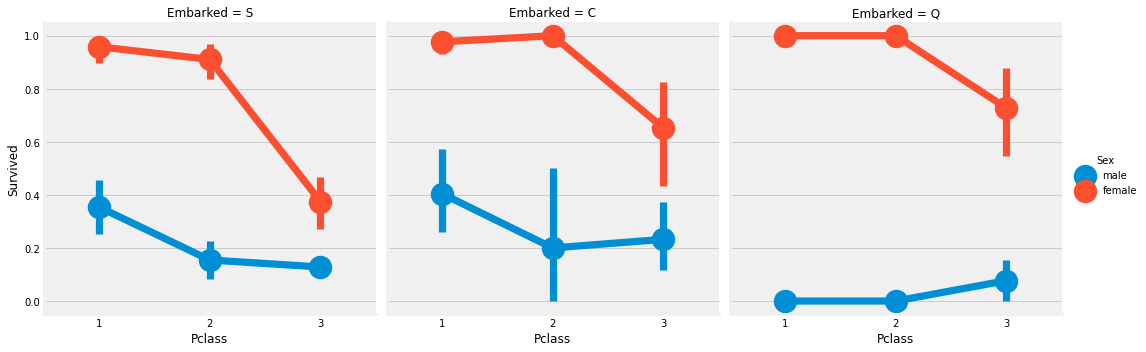

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

**Observations:**  
1) 클래스와 상관없이 1, 2클래스의 여성 승객은 생존률이 거의 1입니다.  
2) S항구의 3클래스 승객들은 성별에 상관없이 생존률이 매우 낮다. (돈의 중요성)  
3) Q항구는 남자들이 매우 불행해 보이는데, 거의 모두가 3클래스여서 인 것 같다.  
  
  
#### Filling Embarked NaN  
우리는 대부분의 승객이 S에서 탑승한 것을 확인했다. NaN 값을 S로 바꾸자.

In [26]:
data['Embarked'].fillna('S', inplace=True)

In [27]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature  
이 특징은 혼자인지 가족과 함께인지를 의미한다.  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


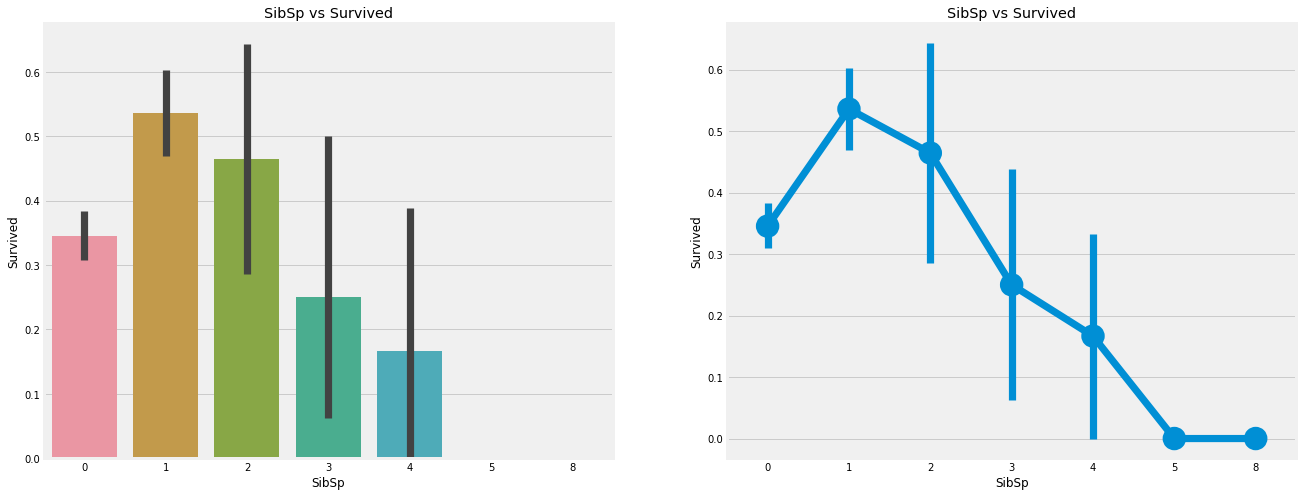

In [29]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**  
그래프들은 혼자인 승객의 생존률이 34.5%라고 보여줍니다. 그리고 silblings의 증가에 따라 그래프가 확연히 감소합니다. 센스를 발휘해서. 이것은 가족과 같이 탔다면, 나 대신 가족을 구하려 했다. 라고 볼 수 있겠습니다. 놀랍게도 5~8인가족의 생존률은 0%입니다. 그 이유는 클래스 때문일까요?  
  
그 이유는 클래스 때문입니다. crosstab은 4인 이상 가족은 모두 3클래스에 있다는 것을 보여줍니다.  
  
  
### Parch


In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab은 다시 대형가족은 3클래스라는 것을 보여줍니다.

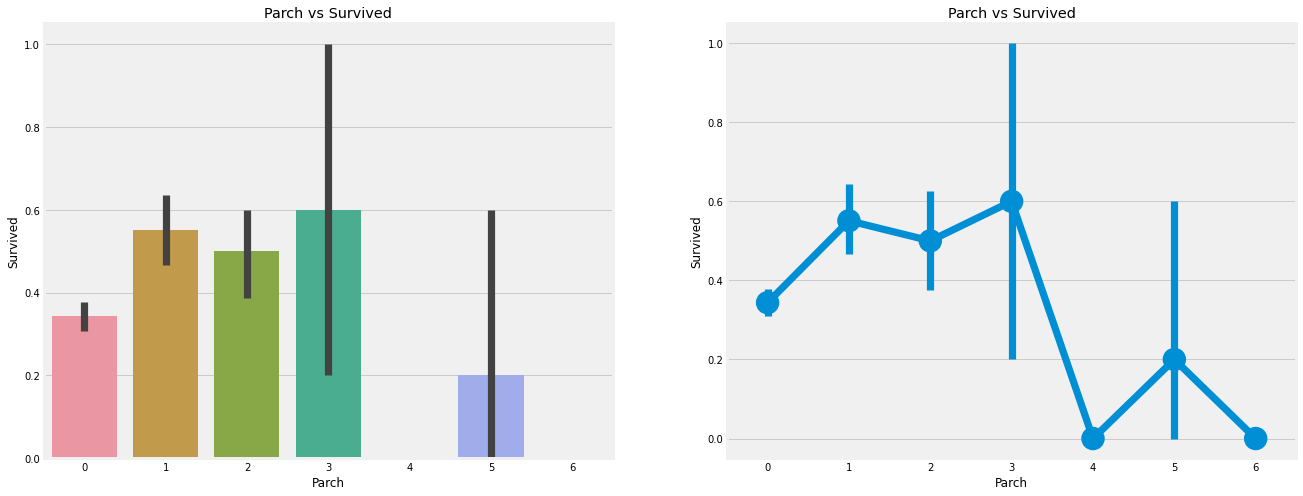

In [32]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

**Observation:**  
비슷한 결과가 나왔습니다. 승객들은 부모님과 함께 탔을 때 높은 생존률을 보입니다. 하지만 수가 많을수록 감소합니다.  
  
생존률은 1~3명의 부모님과 함께 탔을 때 가장 좋고 혼자 있을때와 4명이상의 부모님과 함께 탑승했을 때 생존률이 감소한다.  
  
  
  
  
### Fare -> Continuous Feature

In [33]:
print('Highest Fare was :', data['Fare'].max())
print('Lowest Fare was :', data['Fare'].min())
print('Average Fare was :', data['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was : 0.0
Average Fare was : 32.204207968574636


가장 적은 요금은 0원입니다! 와우 공짜로 탔네요

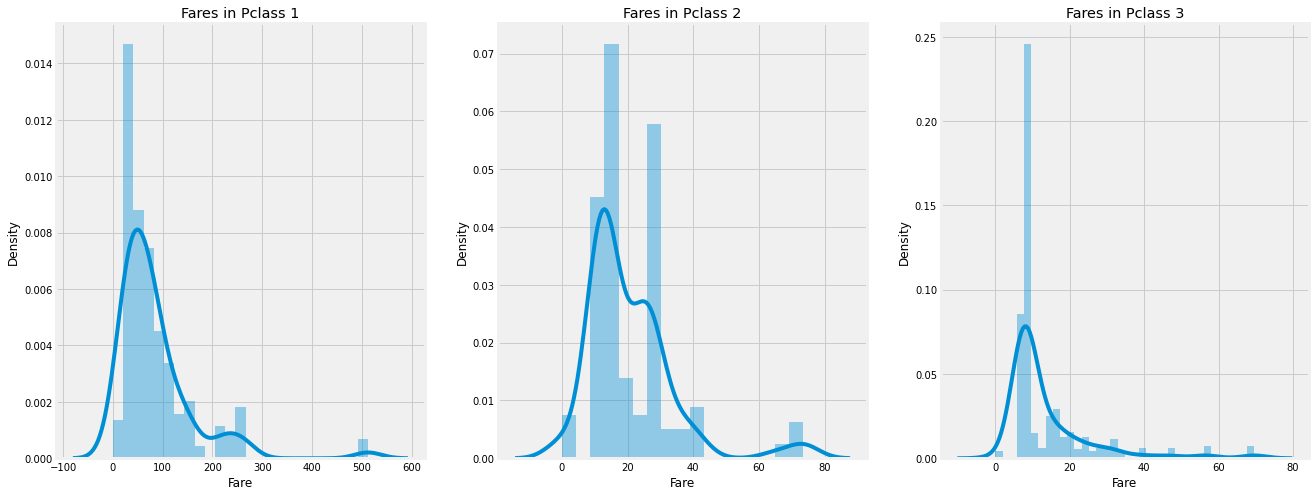

In [34]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

클래스1의 승객 요금에서 큰 분포가 보이고, 그 분포는 표준이 감소함에 따라 계속 감소합니다. 이것은 연속적이어서, 우리는 비닝을 이용해 값을 이산값으로 변환할 수 있습니다.

  
   
   
### Observations in a Nutshell for all features:  
**Sex**: 남성에 비해 여성의 생존률이 높다  
**Pclass**: 1클래스 승객의 생존률이 눈에 띄게 높다. 3클래스에서의 생존률은 매우 낮다. 여성의 경우 1클래스면 거의 100%에 달하는 생존률을 보이며 2클래스 또한 높습니다.  
**Age**: 5-10살의 아이들은 높은 생존률을 보인다 승객 중 15~35살의 승객이 많이 죽었다.  
**Embarked**: 매우 흥미로운 특징입니다. 대부분의 1클래스 승객이 S에서 탑승했지만 C에서의 생존률이 더 좋습니다. Q에서의 승객들은 대부분 3클래스입니다.  
**Parch+SibSp**: 1-2명의 형제자매, 배우자 또는 1-3명의 부모와 탑승했을 경우 혼자있거나 대가족인 경우보다 높은 생존률을 보입니다.  

  
  
### Correlation Between The Features

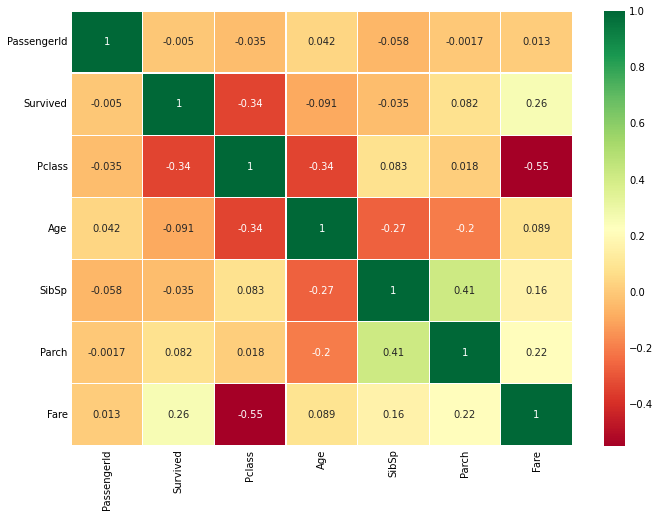

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() : 연관성 매트릭스
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

***Interpreting The Heatmap**  

처음 알 수 있는 것은, 알파벳이나 문자열은 연관지을 수 없기 때문에 숫자와 관련된 특징만이 비교되었다. 그래프를 이해하기 전에 어떤 연관성이 정확한지 보자.  
**POSITIVE CORRELATION :** 특징 A가 특징 B의 증가를 이끌면 positively correlated이다. 1이 최고로 긍정적인 영향  
**NEGATIVE CORRELATION :** 특징 A가 특징 B의 감소를 이끌면 negatively correlated이다. -1이 최고로 부정적인 영향  
이제 두가지 기능이 완벽하게 상관관계를 가지기 때문에 한 특징이 증가하면 다른 특징이 증가한다고 가정해 보겠습니다. 즉, 두 특징 모두 매우 유사한 정보를 포함하고 있으며 정보의 변화가 거의 없다는 것을 의미합니다. 이것을 MultiColinearity 라고 합니다. 
heatmap을 보면, correlation이 높은 특징들이 없다. 제일 높은게 0.41이어서 모든 특징을 다 쓰도록 하겠다.

## Part2: Feature Engineering and Data Cleaning  
Feature Engineering이 뭘까?
특징이 있는 데이터셋을 받았을 때 모든 특징을 학습에 사용할 필요는 없다. 많은 불필요한 중복 데이터가 있을수도 있고, 다른 특징을 분석하여 새로운 특징을 만들어낼 수도 있습니다.  
예를 들면, 이름에서 이니셜을 뽑아온 것 처럼 말이죠. 우리가 어떻게 새로운 특징을 추가하고 불필요한 것을 제거할지 살펴봅시다. 또한 사용할 특징도 모델링에 적합한 형태로 변환해 봅시다.   
  
### Age_band  
**나이 특징의 문제점:**  
먼저 언급했던 것처럼, 나이는 continous feature 입니다. 이러한 특징은 머신러닝에선 문제가 됩니다.  
예를 들어 사람 30명을 분류할 때 성별로 분류하면 남성과 여성으로 쉽게 구분할 수 있지만, 나이별로 분류한다면 연령별로 분류했을 떄 30개로 구분될 수도 있습니다. 이것은 문제가 됩니다.  
우리는 continous values를 구간화 하거나 정규화하여 categorical values로 변환할 것입니다. 저는 구간화를 진행하겠습니다. 나이를 범위에 따라 그룹화하여 한자리 수로 나타냅니다.  
최대나이가 80세이니 0~80을 5로 나누어 16살 단위로 나이를 5구간으로 나누겠습니다.

In [36]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')
# 나이 구간별 인원 확인

,Age_band
1,382
2,325
0,104
3,69
4,11


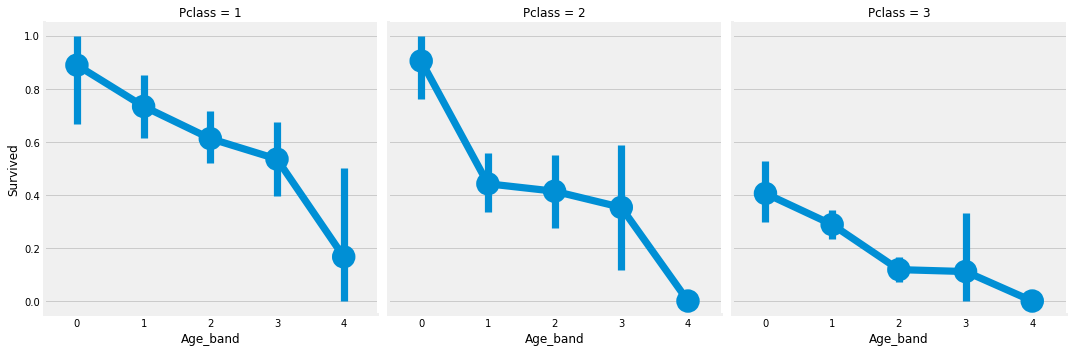

In [38]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

실화냐.. 생존률이 클래스와 상관없이 나이에 따라 감소한다.

#### Family_Size and Alone  
여기서, 우리는 Family_size와 Alone Feature를 추가하여 분석을 진행할 수 있습니다. 해당 특징은 SibSp와 Parch를 합친겁니다. 이것은 생존률이 탑승자와 가족 규모와 관련이 있는지 확인할 수 있게 데이터를 제공할 것이다. Alone은 승객이 혼자인지 여부를 보인다.

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

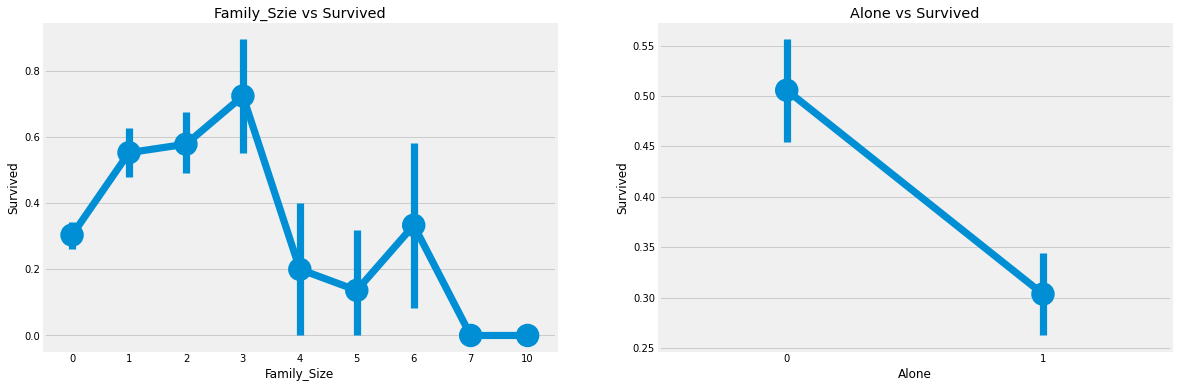

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Szie vs Survived')
sns.pointplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

Family_Size가 0이라는 것은 승객이 Alone이라는 것입니다. 그니깐, 혼자거나 family_size가 0이면, 생존률은 엄청 낮다. family_size가 4이상일 때도 감소하는것은 마찬가지다. 이것 또한 모델에 중요한 특징인 것 같다. 좀 더 살펴보자.

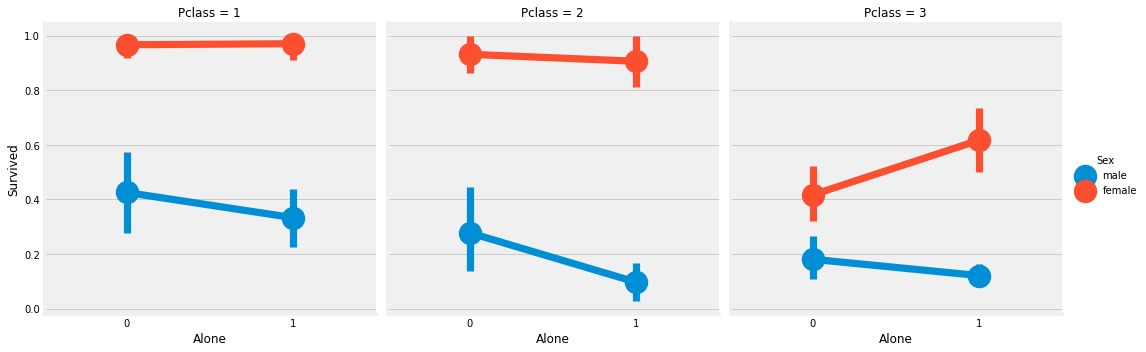

In [41]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

여성들을 제외하곤 혼자있을 경우 생존률이 낮다

#### Fare_Range  
fare도 continous feature다. pandas의 qcut으로 서수로 변환시켜보자.  
qcut이 뭐냐면 bins 수치에 따라 값을 분할시켜준다.

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


우리는 fare_range가 증가할수록 생존률이 증가한다는 것을 알아봤었다.  
우리는 이대로 fare_range를 넘길 수 없다. age_band처럼 한자리 수로 나타내줍시다.

In [43]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat']  = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

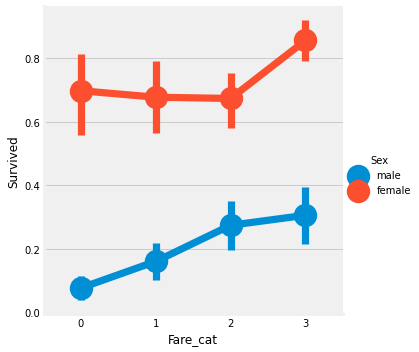

In [44]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Fare_cat이 오를수록 생존률이 아주 명확히 증가합니다. 이것은 성별과 함께 아주 중요한 특징이 될 것입니다.

#### Converting String Values into Numeric  
우리는 문자열 모델을 머신러닝에 학습시킬 수 없습니다. Sex, Embarked 등을 numeric value로 바꿔줍시다.

In [45]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

#### Dropping UnNeeded Features  
Name : 이것은 카테고리화 할 수 없으니 버립시다.  
Age : Age_band로 구간화 해줬으니 age는 버립시다.  
Ticket : 이것은 랜덤한 문자열이라 카테고리화 할 수 없다.  
Fare : Fare_cat으로 카테고리화 해줬으니 필요가 없다.  
Cabin : NaN 값이 많고 여러개의 값을 가지는 승객도 있어서 사용할 수 없을 것 같다.  
Fare_Range : Fare_cat이랑 중복  
PassengerId : 카테고리화 불가

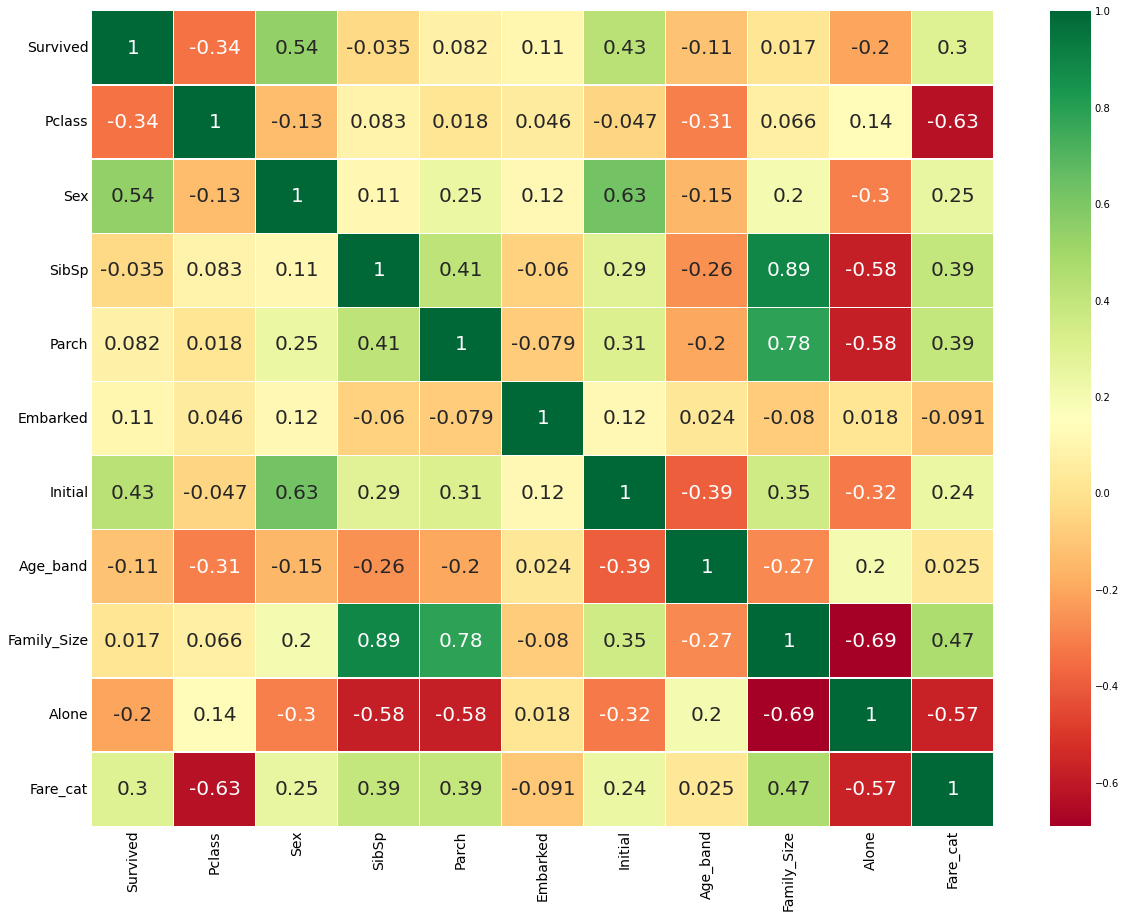

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위 표를 보시면 몇가지 긍정적인 관련성을 볼 수 있습니다. SibSp와 FamilySize, Parch 와 FamilySize가 있고 Alone과 FamilySize는 부정적인 관련성입니다.  
  
  
  
## Part3: Predictive Modeling  
우리는 EDA 파트에서 몇가지 통찰력을 얻었습니다. 하지만 그것들 만으로는 승객의 생사유무를 예측할 수 없습니다. 그래서 우리는 승객의 생사유무를 판단하기 위해 몇가지 좋은 분류 알고리즘을 사용할 것입니다. 아래의 알고리즘들이 우리가 사용해볼 모델들입니다.  
  
1) Logistic Regression  
2) Support Vector Machines(Linear and radial)  
3) Random Forest  
4) K-Nearest Neighbors  
5) Naive Bayes  
6) Decision Tree  
7) Logistic Regression(?? 왜 두번)

In [47]:
#필요한 모든 머신러닝 패키지 참조  
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn import svm # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Navie Bayes
from sklearn.tree import DecisionTreeClassifier # Deicision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix # for confusion matrix

In [48]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [49]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [50]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for rbf SVM is  0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [52]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbors(KNN)  

KNN은 지도학습의 한 종류로, 데이터의 특성이 가장 유사한 것으로 분류하는 알고리즘입니다.  
https://m.blog.naver.com/bestinall/221760380344

In [53]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


KNN모델은 n_neighbors의 속성값에 따라 정확도가 바뀝니다. 기본값은 5로 설정됩니다. 다양한 값에 대한 정확성을 확인해 봅시다.

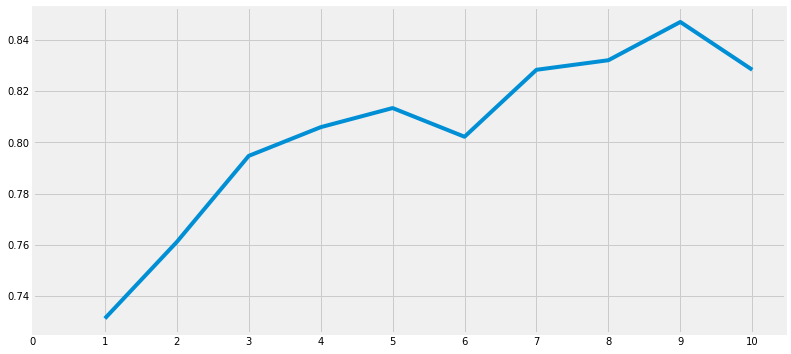

Accuracies for diffrent values of n are : [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [54]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for diffrent values of n are :', a.values, 'with the max value as ', a.values.max())

### Gaussian Naive Bayes
확률을 이용한 가장 합리적인 예측값으로 분류하는 알고리즘  
https://devkor.tistory.com/entry/Gaussian-Naive-Bayes

In [55]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [56]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8097014925373134


Accuracy가 분류 모델을 평가하는 유일한 수치는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 90%의 정확도를 자랑한다고 가정해 봅시다.
성능이 좋은것 같지만 새로 나온 모든 테스트 세트에 대해서도 90%의 정확도를 가질 수 있을까요? 답은 노 입니다. 교육 및 테스트 데이터가 변경됨에 따라 정확도도 변경됩니다. 증가할 수도 있고 감소할 수도 있습니다. 이것을 model variance라고 합니다.  
이를 극복하고 일반화된 모델을 얻기 위해서 교차 검증을 사용합니다.

### Cross Validation  
대부분 데이터는 불균형합니다. 클래스1의 인스턴스가 많지만 다른 클래스의 인스턴스는 적을 수 있습니다. 따라서 우리는 데이터세트의 모든 인스턴스에서 알고리즘을 훈련하고 테스트해야 합니다. 그런 다음 데이터세트에 대해 기록된 모든 정확도의 평균을 얻을 수 있습니다.  
1) K-Fold Corss Validation은 먼저 데이터 세트를 k-서브셋으로 분할하여 작동합니다.  
2) 데이터 집합을 (k=5)개의 부분으로 나눈다고 가정합니다. 우리는 테스트용으로 1개 파트를 예약하고 4개 파트에 걸쳐 알고리즘을 교육합니다.  
3) 우리는 각 반복에서 테스트 파트를 변경하고 다른 파트에 대해 알고리즘을 교육하여 프로세스를 계속합니다. 그런 다음 정확도와 오류는 평균화되어 알고리즘의 평균 정확도를 얻습니다.  이를 K-폴드 교차 검증이라고 합니다.  
4) 알고리즘은 일부 교육 데이터에 대한 데이터 집합보다 적합하지 않을 수 있으며 다른 교육 세트에 대한 데이터보다 적합하지 않을 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있습니다.

In [57]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

kfold = KFold(n_splits=10, random_state=22, shuffle=True) # 데이터 집합을 10개로 나눔 shuffle True로 바꿔줬음
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Navie Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803608,0.042624
Navie Bayes,0.795843,0.054861
Random Forest,0.805868,0.041580


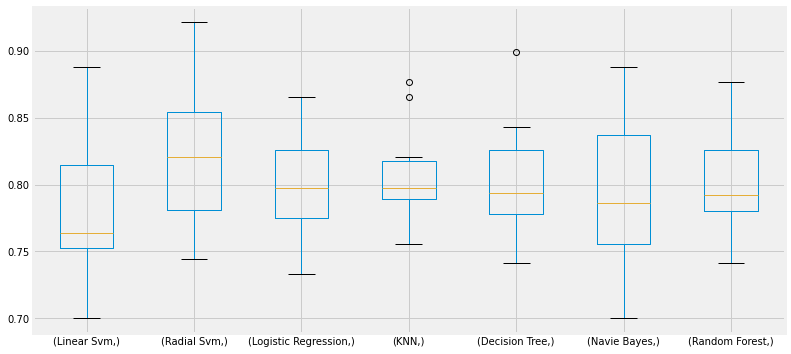

In [58]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

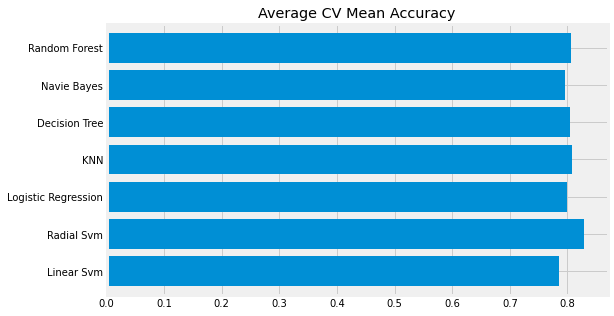

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

불균형으로 인해 분류 정확도가 잘못될 수도 있습니다. confusion matrix의 도움으로 요약된 결과를 얻을 수 있는데, 이 행렬은 모델이 어디에서 잘못되었는지 또는 몯레이 어떤 클래스를 잘못 예측했는지 보여줍니다.

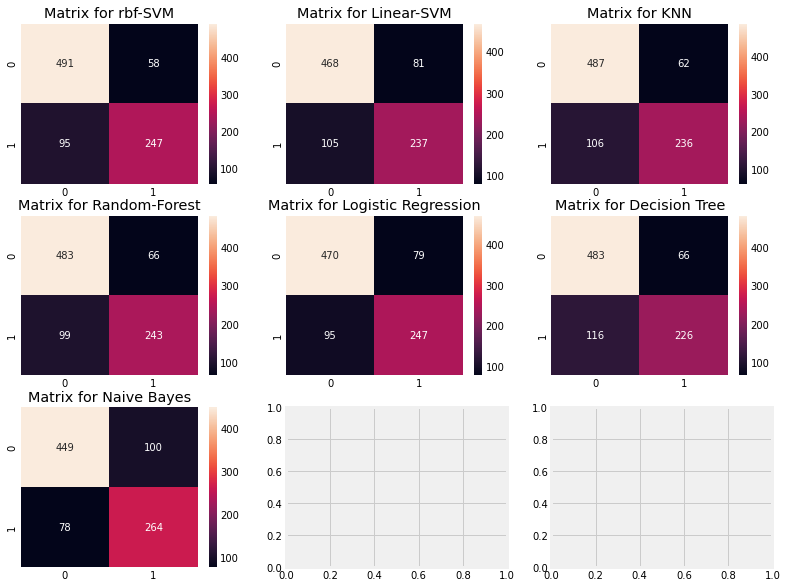

In [60]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forest')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.show()

오차행렬을 해석해봅시다.  
왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM의 첫 번째 그림을 살펴보겠습니다.  
1) 올바른 예측 수는 491 + 247이고 평균 정확도는 (491+247) / 891 = 82.8% 입니다.  
2) 오류 > 58명의 사망자를 생존자로 잘못 분류하고 95명을 생존자로 잘못 분류했습니다. 즉은 사람을 살았다고 잘못 분류하면서 더 많은 실수를 했습니다.  
모든 행렬을 보면 우리는 rbf-SVM이 사망 승객을 정확하게 예측할 확률이 높지만, NaiveBayes는 생존 승객을 정확하게 예측할 확률이 더 높다고 할 수 있습니다.

#### Hyper-Parameters Tuning  
기계학습 모델은 블랙박스와 같습니다. 이 블랙박스에는 더 나은 모델을 얻기 위해서 조정할 수 있는 몇가지 매개변수가 있습니다. SVM모델의 C와 감마처럼 각 분류기마다 다른 파라메터들이 존재합니다. 그 파라메터 값을 조정하는 것이 hyper-parameter tuning입니다.  
우리는 최고의 두 분류기인 SVM과 랜덤포레스트의 하이퍼 파라메터를 조정해 볼겁니다.

#### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.9, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


여러 값들을 배열로 입력해 두고 해당 값을 조정하면서 성능을 체크해줌 근데 왜 kernel은 안나왔을까

#### Random Forests

In [62]:
n_estimators = range(100, 1000, 100) # 앙상블 기법에서 하위 모델을 몇개 사용할 건지 결정
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


최고점은 SVM의 경우 C = 0.4, gamma = 0.3 일 때, 82.82%  
Random Forest의 경우 n_estimators가 300일 때 81.9% 입니다.

### Ensembling  
앙상블은 정확도나 모델의 성능을 높이는 좋은 방법이다. 여러 단일 모델을 합쳐서 또다른 성능이 우수한 모델을 만드는 것이다.  
우리가 휴대폰을 살 때 많은 정보들을 기반으로 사람들에게 물어본 뒤 산다고 해봅시다. 우리는 모든 파라메터를 분석하여 단일 제품에 대한 강력한 판단을 내릴 수 있습니다. 이것은 모델의 안정성을 향상시키는 앙상블링입니다. 앙상블은 다음과 같은 방법으로 수행할 수 있습니다.  
1) Voting Classifier  
2) Bagging  
3) Boosting

#### Voting Classifier  
이것은 여러 모델을 합쳐 예측하는 방법중 가장 간단합니다. 이것은 다양한 하위 모델들의 예측의 평균을 알려줍니다. 하위 모델과 기본 모델은 모두 다른 모델입니다.  
- 여러 모델을 생성해서 결과를 비교하고 결과를 집계해서 가장 많은 표를 얻은 클래스를 최종 예측값으로 정함 (Hard Voting Classifier) Soft는 각 분류기에서 클래스의 확률을 예측할 수 있도록 하고 예측을 평균내서 확률이 가장 높은 클래스로 예측 (https://nonmeyet.tistory.com/entry/Python-Voting-Classifiers%EB%8B%A4%EC%88%98%EA%B2%B0-%EB%B6%84%EB%A5%98%EC%9D%98-%EC%A0%95%EC%9D%98%EC%99%80-%EA%B5%AC%ED%98%84)

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.4)), 
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()), 
                                                ('svm', svm.SVC(kernel='linear', probability=True))], 
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8237952559300872


#### Bagging
배깅은 일반적인 앙상블 함수이다. 데이터세트의 작은 파티션에 유사한 분류기를 적용한 후 모든 예측의 평균을 취함으로 동작합니다. Voting Classifier와 다르게 배깅은 유사한 분류기를 사용합니다.  
  
  - 배깅을 사용한 예가 랜덤 포레스트이다. 데이터를 랜덤 샘플링하여 모델을 학습시키고 학습된 모델의 결과를 집계하여 최종 결과 값을 구한다.
  - Categorical Data는 투표로, Continous Data는 평균으로 집계한다.
   
  
Bagged KNN  
배깅은 분산이 높을때 좋습니다. 예로는 디시젼트리와 랜덤포레스트가 있습니다. 우리는 KNN에 작은 n_neighbors를 사용할 수 있습니다.

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged Decision Tree

In [65]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting
부스팅은 분류기의 순차 학습을 사용하는 앙상블 기술입니다. 약한 모델을 단계별로 개선한 것입니다. 부스팅은 아래와 같이 동작합니다.  
모델은 먼저 전체 데이터 세트에 대해 학습됩니다. 이제 모델은 일부 인스턴스는 맞지만 일부는 틀립니다. 다음 반복에서 학습자는 잘못 예측된 사례에 좀 더 초점을 맞추거나 더 많은 가중치를 부여합니다. 따라서, 잘못된 인스턴스를 정확하게 예측하려고 합니다. 이 프로세스는 정확도 한계에 도달할 때까지 새 분류기가 계속 모델에 추가되면서 진행됩니다.  
  
- 배깅은 각 분류기가 독립적으로 결과를 예측한 후에 종합하지만 부스팅은 모델간에 팀워크가 이루어진다. 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 준다.  
- 배깅과 부스팅 > (https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting)

##### AdaBoost(Adaptive Boosting)  
하위 모델이 의사결정트리 입니다. 하지만 우리는 기본 base_estimator를 원하는 알고리즘으로 변경할 수 있습니다.  
- 각각의 트리가 예측을 하지만 랜덤포레스트와 다르게 각각의 트리의 영향력이 다르다. 가중치를 높게 받은 트리의 발언이 강해진다 라는 느낌

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting  
여기 또한 의사결정 트리을 사용합니다.  
- 모델을 개선해 나가면서 계속해서 새로운 모델을 만들어 최종 모델을 생성해낸다. (https://3months.tistory.com/368) 
- 테스트 데이터에 대한 과적합 문제가 있음

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8115230961298376


##### XGBoost  
- Extream Gradient Boosting의 약자이다.
- Gradient Boosting을 병렬학습으로 지원한다. GBM에 비해 빠르고 GBM에는 없는 과적합 규제기능이 있다.

In [68]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is :', result.mean())

The cross validated score for XGBoost is : 0.8115480649188515


AdaBoost가 가장 가장 높은 점수를 보이니 여기에 Hyper-Parameter Tuning을 적용하겠습니다.

##### Hyper-Parameter Tuning for AdaBoost

In [69]:
n_estimators = list((range(100,1100,100)))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


##### Confusion Matrix for the Best Model

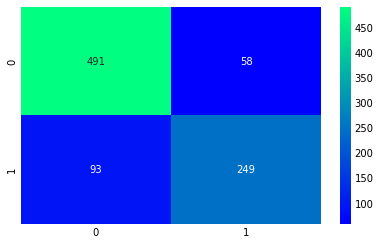

In [70]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

#### Feature Importance

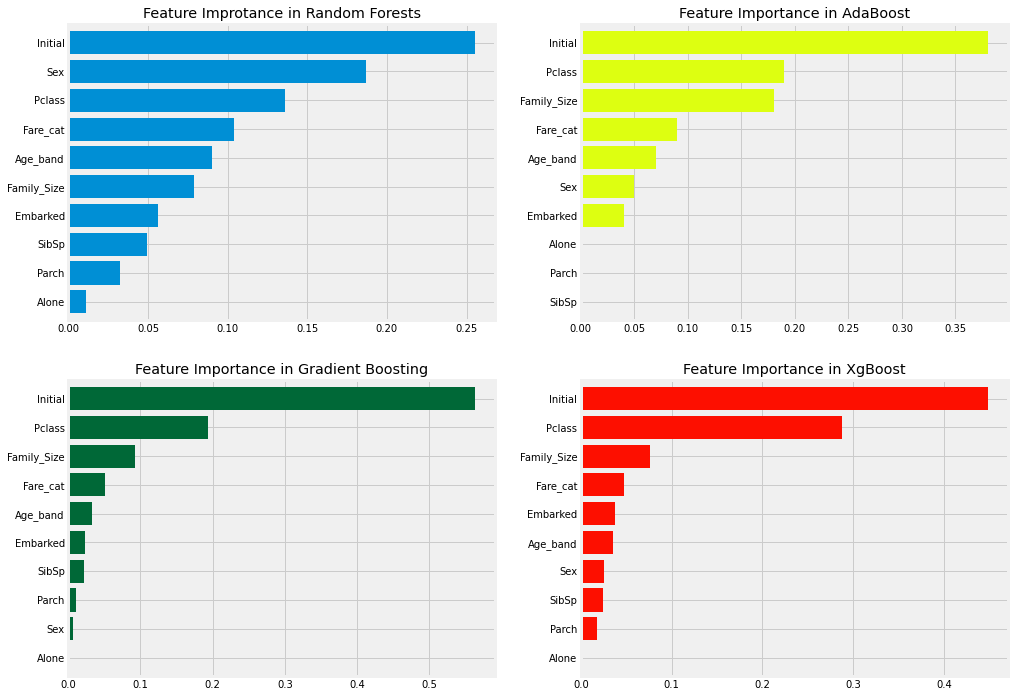

In [71]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Improtance in Random Forests')
model = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()

우리는 각 분류기에서 중요한 특징이 무엇이었는지 확인할 수 있습니다.  
  
**Observations:**  
1) 공통의 중요한 피쳐들은 Initial, Pclass, Family_Size등이 있습니다.  
2) 성별이 Random Forest를 제외하곤 그다지 중요한 특징으로 구분되지 않았습니다. 그러나 가장 중요한 특징인 이니셜이 성별과 크게 연관이 있었습니다.   
3) 비슷하게 Pclass와 Fare_cat, Family_Size, Parch and SibSp등의 관계가 있습니다.

## 회고  
- 저번 타이타닉 튜토리얼과 비슷하지만 조금은 다른 흐름으로 데이터를 분석해봄으로 데이터 분류작업에 대한 가닥이 조금 잡히는듯한 느낌이 들었다.
- 시간에 너무 쫓겨서 각 항목에 대해 자세히 파고들지 못했는데 그런 부분들은 링크를 남겨뒀으니 조금 더 보충해서 복습을 해야할 것 같다.
- 다이타닉 캐글 필사 원본과 다른 결과들이 꽤 나와서 약간 나한테 나온 결과에 맞게 수정을 해서 학습을 진행했는데 마지막 그래프에서 더욱 큰 차이가 나왔다.  
- 캐글 노트북으로 깃허브에 올리니까 실행 결과가 출력이 안되서 코랩 프로를 GPU로 연결해서 해봤는데 AdaBoost 앙상블 기법을 Hyper-parameter tuning할 때 엄청 오래걸렸던 것 같은데 조금 더 빨리 학습이 된 것 같다. (기분탓일수도)